# Assignment 6
**Perform a univariate analysis on the dataset that you chose in portfolio assignment 4 in:**
- At least 2 columns with categorical data,
- At least 2 columns with numerical data.
- Write down for each analysis an assumption and after the analysis your findings.

---

![](https://images.ctfassets.net/4e8xy1krjypg/A6Xf1MfISZhiQWuyGFDpV/b48be1afb29fcef49f596810281ba226/PillarPage-Qual-Quan-3.svg)

Ik had gekozen voor: https://www.kaggle.com/datasets/abcsds/pokemon/data, (Pokemon.csv, terug te vinden in opdracht 4)

In [1]:
# Laad benodigdheden in voor de rest van dit bestand.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pokemon = pd.read_csv('Pokemon.csv', sep=',')


---

### Categorical data 1:
Ik ga de verschillende "first types" met elkaar vergelijken, elk pokemon heeft 1 type en soms 2, we kijken nu naar het eerste type, wat elke pokemon dus heeft!
##### Assumption:
Ik verwacht dat de "types" van pokemon vrij gelijk verdeeld zijn omdat dat meer balans geeft in de games met uitzondering op "normal" types omdat die vaak in het begin van de games al in overvloed te vinden zijn.


<Axes: xlabel='Type 1'>

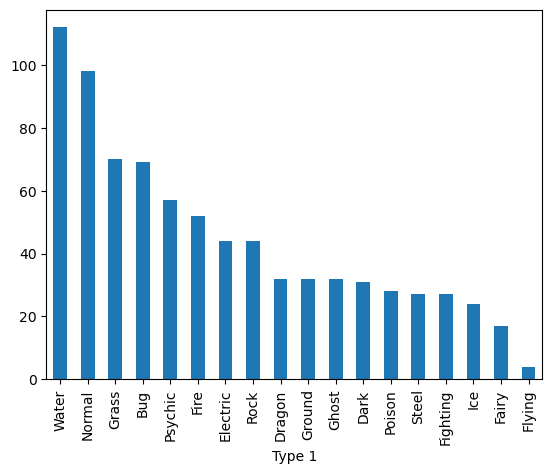

In [20]:
pokemon['Type 1'].value_counts(dropna=True).plot(kind='bar')

##### Findings:
Een onverwachte uitkomst is dat water het meeste voorkomt als eerste type, normal types had ik in mijn assumption al aangegeven, de rest van de types komen vrij gelijk overeen met hoeveelheden behalve flying types, ik weet uit mijn ervaring met de games dat dit komt omdat "flying" bijna altijd als 2de type gebruikt word, dus dat dit alleen de pokemon zijn met ALLEEN flying als type, ondanks deze kennis ga ik dit in het volgende kopje verder analyseren.

---

### Categorical data 2:
Door de uitkomst van de vorige data wil ik testen of het 2de type een zelfde soort resultaat geeft, ik weet dat de resultaten waarschijnlijk minder zullen zijn in totaal omdat niet elke pokemon een 2de type heeft, veel wel!
##### Assumption:
Ik verwacht dat flying types extreem hoog gaan staan vergeleken met andere types door de bevindingen van de vorige analyse, daarnaast verwacht ik dat de rest weer ongeveer gelijk gaat zijn met elkaar.

<Axes: xlabel='Type 2'>

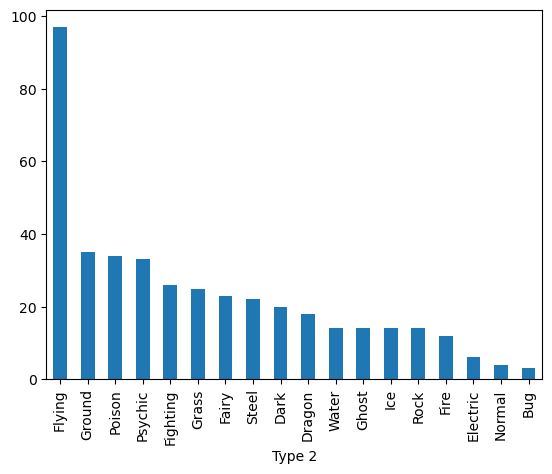

In [7]:
pokemon['Type 2'].value_counts(dropna=True).plot(kind='bar')

##### Findings:
Zoals ik eerder dacht is flying een koploper als het gaat om 2de type, de rest lijkt vrij gelijkmatig te zijn naast electric, normal en bug die veel lager scoren dan de rest.

---

### Numerical data 1:
Hier ga ik het gemiddelde bekijken van de Attack stat bij de pokemon
##### Assumption:
De gemiddelde ‘Attack’ van Pokémon ligt ergens rond de 70/80, met enkele uitschieters bij bijv vechttypes, mega's of legendary's.

Mean      79.00125
Median    75.00000
dtype: float64


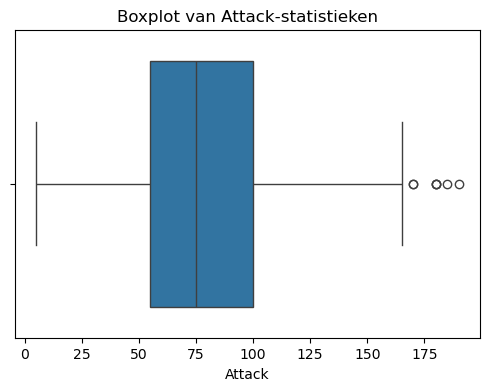

In [2]:
average = pd.Series(
    [pokemon['Attack'].mean(), pokemon['Attack'].median()],
    index=['Mean', 'Median']
)
plt.figure(figsize=(6, 4))
sns.boxplot(x=pokemon['Attack'])
plt.title('Boxplot van Attack-statistieken')
plt.xlabel('Attack')

print(average)
plt.show()

##### Findings:
Zoals eerder gedacht komt het gemiddelde mooi rond tussen de 70/80, ik had wat grotere uitschiet impact verwacht bij het gemiddelde omdat sommige pokemon wel meer dan 150 attack punten hebben, maar ook dit valt enorm mee. Waarschijnlijk komt dit omdat sommige pokemon juist extreem lage atk hebben zoals bijvoorbeeld 'Happiny' en 'Chansey' met een attack van 5.

---

### Numerical data 2:
Ik ga kijken welke pokemon de laagste/hoogste total stats hebben, alle stats bij elkaar opgeteld dus.
##### Assumption:
De pokemon met de laagste 'Total'-stats zijn waarschijnlijk basisvormen(vooral bug types waarschijnlijk) of baby-Pokémon, de hoogste zijn waarschijnlijk mega's of legendary's.

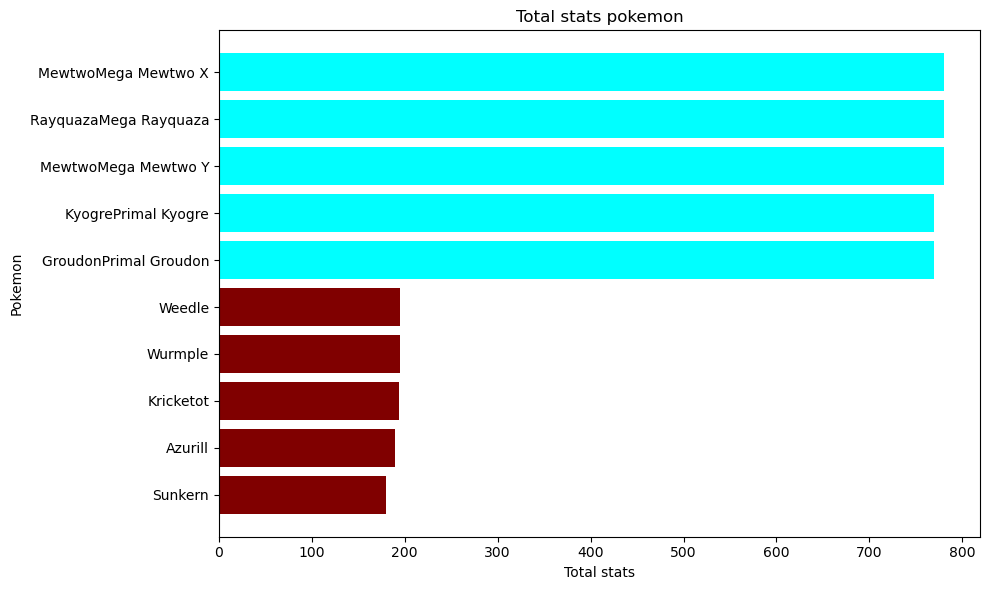

In [42]:
lowest = pokemon.sort_values('Total').head(5)
lowest['Category'] = 'Lowest'
highest = pokemon.sort_values('Total').tail(5)
highest['Category'] = 'Highest'
data = pd.concat([lowest, highest])
colors = {'Lowest': 'maroon', 'Highest': 'aqua'}
fig, ax = plt.subplots(figsize=(10, 6))

for category in colors:
    c_data = data[data['Category'] == category]
    ax.barh(c_data['Name'], c_data['Total'], color=colors[category])

ax.set_xlabel('Total stats')
ax.set_ylabel('Pokemon')
ax.set_title('Total stats pokemon')
plt.tight_layout()
plt.show()


##### Findings:
Zoals bij de assumptions al aangegeven was verwachte ik dat de laagste total-stat pokemon waarschijnlijk bug-types of babyvorm waren, op sunkern na is alles bug-type! wat ik niet had verwacht was dat deze grass type de aller laagste total-stats had, ondanks dat het een basisvorm is. 

De hoogste waardes had ik gedeeltelijk verwacht, het zijn allemaal legendary's maar dan de sterkere/mega versie van hun, dus het was niet echt een mega "of" legendary maar meer een combinatie van beide.